<a href="https://colab.research.google.com/github/PhelanGlick/MAT-494/blob/main/1_4_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here are some examples of using PCA with data.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.datasets import load_breast_cancer

Before using PCA, we will take a look at the target since the data has it. PCA should try to create a visual that will make these two sets stand out

In [26]:
bcancer = load_breast_cancer()
bdata = bcancer.data
btarget = bcancer.target
target = np.reshape(btarget,(btarget.size, 1))

final_bdata = np.concatenate([bdata,target],axis=1)
bdataset = pd.DataFrame(final_bdata)
features = bcancer.feature_names
features_labels = np.append(features,'target')
bdataset.columns = features_labels

bdataset['target'].replace(0, 'Benign',inplace=True)
bdataset['target'].replace(1, 'Malignant',inplace=True)
bdataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


Very last collum is the target trait that hopefully PCA can make more distinct visually.

<Figure size 432x288 with 0 Axes>

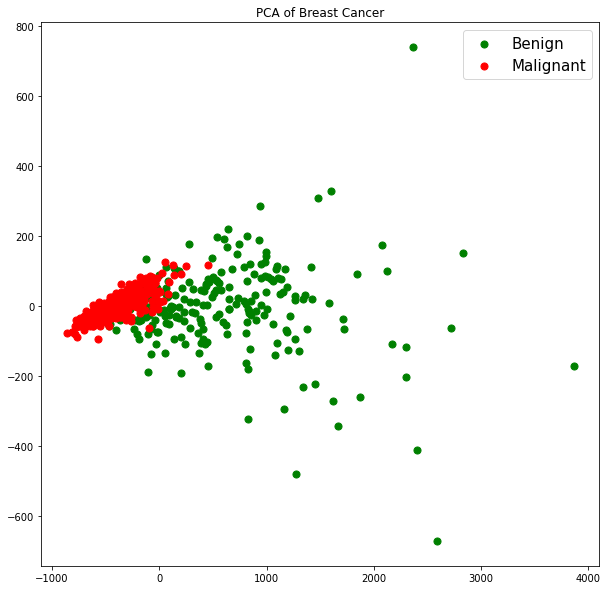

In [39]:
pca = PCA(n_components=2)
pca_bcancer = pca.fit_transform(bdata)

pca_bcancer_DF = pd.DataFrame(data = pca_bcancer, columns = ['c1', 'c2'])


plt.figure()
plt.figure(figsize=(10,10))
plt.title("PCA of Breast Cancer")
targets = ['Benign', 'Malignant']
colors = ['g', 'r']

for target, color in zip(targets,colors):
    indicesToKeep = bdataset['target'] == target
    plt.scatter(pca_bcancer_DF.loc[indicesToKeep, 'c1'], pca_bcancer_DF.loc[indicesToKeep, 'c2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15});

Looks like one can use this visual to safely rule out many benign cases, but not the other way around. There are many benign cases that overlap in malignant territory. 